In [1]:
import os
import cv2
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

In [2]:
path = 'C:/Users/Ishaan/Downloads/planes/planesnet/planesnet/'
files = os.listdir(path)

In [3]:
def extract_data(file):
    label = int(file.split('__')[0])
    
    img = plt.imread(os.path.join(path, file))
    return img, label

In [4]:
data = []
labels = []

for file in files:
    img, label = extract_data(file)
#     img = img[:,:,1]
    data.append(img)
    labels.append(label)
    
data = np.array(data)
labels = np.array(labels)

In [5]:
x_train, x_test, y_train, y_test = train_test_split(data, labels, test_size=0.2)

In [6]:
print(len(x_train), x_train.shape)
print(len(x_test), x_test.shape)

25600 (25600, 20, 20, 3)
6400 (6400, 20, 20, 3)


In [7]:
x_train[0].shape

(20, 20, 3)

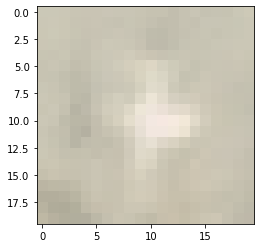

In [8]:
plt.imshow(x_train[0])

# Training Model 

In [9]:
import tensorflow as tf
from tensorflow import keras

In [10]:
cnn = keras.Sequential([
    #cnn
    keras.layers.Conv2D(filters=32, kernel_size=(3,3), activation=keras.layers.LeakyReLU(alpha=0.01), input_shape=(20,20,3,)),
    keras.layers.MaxPooling2D((2,2)),
    
    #dense
    keras.layers.Flatten(),
    keras.layers.Dense(64, activation=keras.layers.LeakyReLU(alpha=0.01)),
    keras.layers.Dense(2,activation='softmax'),     
    
])

In [13]:
cnn.compile(optimizer='adam', loss='sparse_categorical_crossentropy',metrics=['accuracy'])

In [14]:
cnn.fit(x_train, y_train, epochs=20)

Epoch 1/10
800/800 [==============================] - 98s 122ms/step - loss: 0.1640 - accuracy: 0.9372
Epoch 2/10
800/800 [==============================] - 110s 138ms/step - loss: 0.1221 - accuracy: 0.9539
Epoch 3/10
800/800 [==============================] - 100s 125ms/step - loss: 0.1049 - accuracy: 0.9608
Epoch 4/10
800/800 [==============================] - 100s 125ms/step - loss: 0.0835 - accuracy: 0.9693
Epoch 5/10
800/800 [==============================] - 99s 123ms/step - loss: 0.0727 - accuracy: 0.9736
Epoch 6/10
800/800 [==============================] - 107s 134ms/step - loss: 0.0643 - accuracy: 0.9762
Epoch 7/10
800/800 [==============================] - 104s 131ms/step - loss: 0.0548 - accuracy: 0.9813
Epoch 8/10
800/800 [==============================] - 95s 118ms/step - loss: 0.0523 - accuracy: 0.9817
Epoch 9/10
800/800 [==============================] - 75s 94ms/step - loss: 0.0436 - accuracy: 0.9841
Epoch 10/10
800/800 [==============================] - 73s 92ms/step 

In [16]:
cnn.evaluate(x_test, y_test)

200/200 [==============================] - 1s 4ms/step - loss: 0.1268 - accuracy: 0.9638


[0.12679745256900787, 0.9637500047683716]

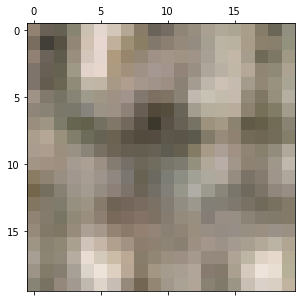

In [14]:
plt.matshow(x_test[10])

In [15]:
y_test[10]

0

In [25]:
   from keras.models import load_model
   cnn.save('model.h5')

In [80]:
photo_path = 'C:/Users/Ishaan/Desktop/Projects/Aircraft Detection/testing.png'

In [81]:
photo = plt.imread(photo_path)

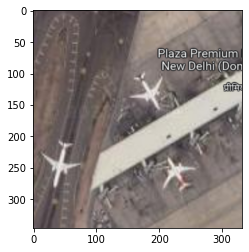

In [82]:
plt.imshow(photo)

In [83]:
photo.shape

(346, 332, 4)

In [84]:
photo = cv2.cvtColor(photo, cv2.COLOR_BGRA2BGR)

In [85]:
photo.shape

(346, 332, 3)

In [86]:
photo = cv2.resize(photo,(20,20))

In [87]:
photo.shape

(20, 20, 3)

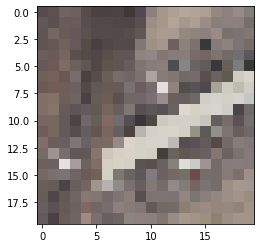

In [88]:
plt.imshow(photo)

In [89]:
photo = photo.reshape(-1,20,20,3)

In [90]:
cnn.predict(photo)

1/1 [==============================] - 0s 26ms/step


array([[0.12004194, 0.8799581 ]], dtype=float32)

In [91]:
res = np.argmax(cnn.predict(photo))

1/1 [==============================] - 0s 22ms/step


In [92]:
res

1